### Imports

In [74]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import table

#### Carregamento das bases

In [75]:
wine_export = pd.read_excel("files/wine_export.xlsx",engine="openpyxl")

In [76]:
wine_export

,Continent,Region/Country,Product,Variable,Year,Unit,Quantity
0,Europe,Albania,Wine,Exports,2008,1000 hl,0
1,Europe,Albania,Wine,Exports,2009,1000 hl,0
2,Europe,Albania,Wine,Exports,2010,1000 hl,0
3,Europe,Albania,Wine,Exports,2011,1000 hl,0
4,Europe,Albania,Wine,Exports,2012,1000 hl,0
...,...,...,...,...,...,...,...
2365,Africa,Zimbabwe,Wine,Exports,2018,1000 hl,0
2366,Africa,Zimbabwe,Wine,Exports,2019,1000 hl,0
2367,Africa,Zimbabwe,Wine,Exports,2020,1000 hl,0
2368,Africa,Zimbabwe,Wine,Exports,2021,1000 hl,0


#### Informação do Brasil (15 anos)

In [77]:
brazil_wine = wine_export[wine_export['Region/Country'] == "Brazil"]
global_wine = wine_export[wine_export['Region/Country'] == "Global"]

In [78]:
brazil_wine

,Continent,Region/Country,Product,Variable,Year,Unit,Quantity
315,America,Brazil,Wine,Exports,2008,1000 hl,96
316,America,Brazil,Wine,Exports,2009,1000 hl,257
317,America,Brazil,Wine,Exports,2010,1000 hl,15
318,America,Brazil,Wine,Exports,2011,1000 hl,13
319,America,Brazil,Wine,Exports,2012,1000 hl,59
320,America,Brazil,Wine,Exports,2013,1000 hl,91
321,America,Brazil,Wine,Exports,2014,1000 hl,27
322,America,Brazil,Wine,Exports,2015,1000 hl,13
323,America,Brazil,Wine,Exports,2016,1000 hl,20
324,America,Brazil,Wine,Exports,2017,1000 hl,32


In [79]:
global_wine

,Continent,Region/Country,Product,Variable,Year,Unit,Quantity
930,Global,Global,Wine,Exports,2008,1000 hl,89969
931,Global,Global,Wine,Exports,2009,1000 hl,88517
932,Global,Global,Wine,Exports,2010,1000 hl,96315
933,Global,Global,Wine,Exports,2011,1000 hl,103726
934,Global,Global,Wine,Exports,2012,1000 hl,104255
935,Global,Global,Wine,Exports,2013,1000 hl,102395
936,Global,Global,Wine,Exports,2014,1000 hl,104341
937,Global,Global,Wine,Exports,2015,1000 hl,105959
938,Global,Global,Wine,Exports,2016,1000 hl,105533
939,Global,Global,Wine,Exports,2017,1000 hl,110316


In [80]:
def convert_value(x):
    return (x*1000)

temp_br = brazil_wine['Quantity']
values = temp_br.apply(convert_value)
brazil_wine['Total_Value'] = values

temp_global = global_wine['Quantity']
values_global = temp_global.apply(convert_value)
global_wine['Total_Value'] = values_global

brazil_wine['Total_World'] = global_wine['Total_Value']

temp = wine_export['Quantity']
num = temp.apply(convert_value)
wine_export['Total_Value'] = num

/tmp/ipykernel_96198/3030320971.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brazil_wine['Total_Value'] = values
/tmp/ipykernel_96198/3030320971.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  global_wine['Total_Value'] = values_global
/tmp/ipykernel_96198/3030320971.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/

In [81]:
merged_dfs = pd.merge(brazil_wine, global_wine, on='Year', suffixes=('_Brazil', '_Global'))

# Calcula o percentual de exportação do Brasil em relação ao total global
merged_dfs['Percentual'] = ((merged_dfs['Quantity_Brazil'] / merged_dfs['Quantity_Global']) * 100).round(2)

# Exibe o DataFrame com a nova coluna
# ['Year','Region/Country_Brazil','Total_Value_Brazil','Total_Value_Global','Percentual']
merged_dfs

,Continent_Brazil,Region/Country_Brazil,Product_Brazil,Variable_Brazil,Year,Unit_Brazil,Quantity_Brazil,Total_Value_Brazil,Total_World,Continent_Global,Region/Country_Global,Product_Global,Variable_Global,Unit_Global,Quantity_Global,Total_Value_Global,Percentual
0,America,Brazil,Wine,Exports,2008,1000 hl,96,96000,NaN,Global,Global,Wine,Exports,1000 hl,89969,89969000,0.11
1,America,Brazil,Wine,Exports,2009,1000 hl,257,257000,NaN,Global,Global,Wine,Exports,1000 hl,88517,88517000,0.29
2,America,Brazil,Wine,Exports,2010,1000 hl,15,15000,NaN,Global,Global,Wine,Exports,1000 hl,96315,96315000,0.02
3,America,Brazil,Wine,Exports,2011,1000 hl,13,13000,NaN,Global,Global,Wine,Exports,1000 hl,103726,103726000,0.01
4,America,Brazil,Wine,Exports,2012,1000 hl,59,59000,NaN,Global,Global,Wine,Exports,1000 hl,104255,104255000,0.06
5,America,Brazil,Wine,Exports,2013,1000 hl,91,91000,NaN,Global,Global,Wine,Exports,1000 hl,102395,102395000,0.09
6,America,Brazil,Wine,Exports,2014,1000 hl,27,27000,NaN,Global,Global,Wine,Exports,1000 hl,104341,104341000,0.03
7,America,Brazil,Wine,Exports,2015,1000 hl,13,13000,NaN,Global,Global,Wine,Exports,1000 hl,105959,105959000,0.01
8,America,Brazil,Wine,Exports,2016,1000 hl,20,20000,NaN,Global,Global,Wine,Exports,1000 hl,105533,105533000,0.02
9,America,Brazil,Wine,Exports,2017,1000 hl,32,32000,NaN,Global,Global,Wine,Exports,1000 hl,110316,110316000,0.03


In [82]:
final_df = merged_dfs[['Year','Region/Country_Brazil','Total_Value_Brazil','Total_Value_Global','Percentual']]

final_df.rename(columns={'Year':'Ano','Region/Country_Brazil':'País','Total_Value_Brazil':'Total de Vinho Exportado Brasil (L)','Total_Value_Global':'Total de Vinho Exportado Global (L)'},inplace=True)
final_df

/tmp/ipykernel_96198/1920383122.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df.rename(columns={'Year':'Ano','Region/Country_Brazil':'País','Total_Value_Brazil':'Total de Vinho Exportado Brasil (L)','Total_Value_Global':'Total de Vinho Exportado Global (L)'},inplace=True)


,Ano,País,Total de Vinho Exportado Brasil (L),Total de Vinho Exportado Global (L),Percentual
0,2008,Brazil,96000,89969000,0.11
1,2009,Brazil,257000,88517000,0.29
2,2010,Brazil,15000,96315000,0.02
3,2011,Brazil,13000,103726000,0.01
4,2012,Brazil,59000,104255000,0.06
5,2013,Brazil,91000,102395000,0.09
6,2014,Brazil,27000,104341000,0.03
7,2015,Brazil,13000,105959000,0.01
8,2016,Brazil,20000,105533000,0.02
9,2017,Brazil,32000,110316000,0.03


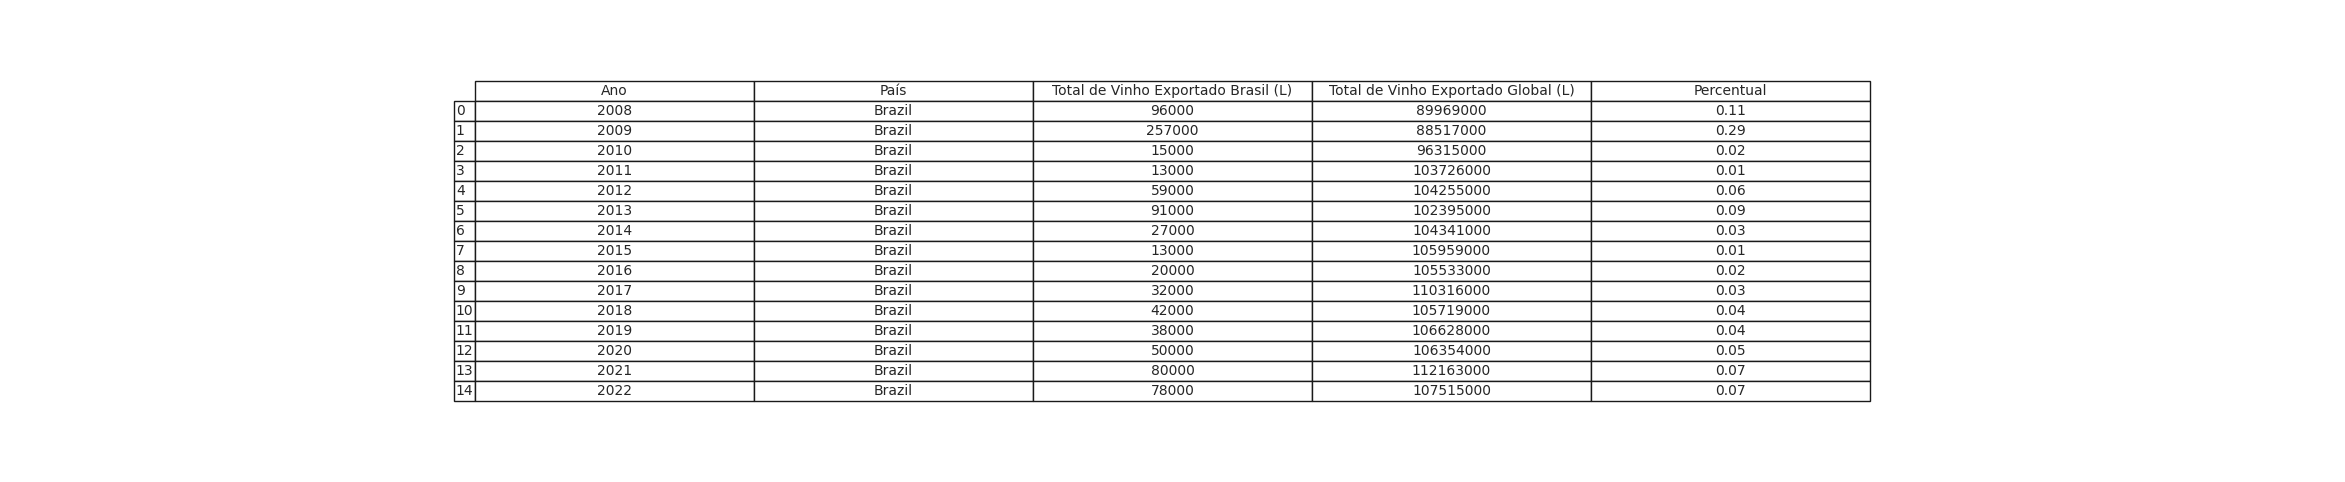

In [83]:
# Configurar o tamanho da figura
fig, ax = plt.subplots(figsize=(30, 6))  # Ajuste o tamanho conforme necessário

# Remover os eixos
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.set_frame_on(False)

# Criar a tabela e adicionar ao gráfico
tbl = table(ax, final_df, loc='center', cellLoc='center', colWidths=[0.1]*len(final_df.columns))

# Estilizar a tabela
tbl.auto_set_font_size(False)
tbl.set_fontsize(10)
tbl.scale(1.2, 1.2)

# Salvar a tabela como imagem
plt.savefig('tabela_exportação.png', bbox_inches='tight', dpi=300)

# Exibir a imagem
plt.show()

#### Informação Mundo (15 anos)

In [84]:
wine_export

,Continent,Region/Country,Product,Variable,Year,Unit,Quantity,Total_Value
0,Europe,Albania,Wine,Exports,2008,1000 hl,0,0
1,Europe,Albania,Wine,Exports,2009,1000 hl,0,0
2,Europe,Albania,Wine,Exports,2010,1000 hl,0,0
3,Europe,Albania,Wine,Exports,2011,1000 hl,0,0
4,Europe,Albania,Wine,Exports,2012,1000 hl,0,0
...,...,...,...,...,...,...,...,...
2365,Africa,Zimbabwe,Wine,Exports,2018,1000 hl,0,0
2366,Africa,Zimbabwe,Wine,Exports,2019,1000 hl,0,0
2367,Africa,Zimbabwe,Wine,Exports,2020,1000 hl,0,0
2368,Africa,Zimbabwe,Wine,Exports,2021,1000 hl,0,0


In [85]:
# Agrupar por ano e encontrar o país com a maior quantidade exportada
wine_filtered = wine_export[wine_export['Region/Country'] != 'Global']

max_export = wine_filtered.loc[wine_filtered.groupby('Year')['Total_Value'].idxmax()]
# max_export

# Renomear as colunas 
max_export = max_export.rename(columns={'Total_Value': 'Quantidade de Litros', 'Region/Country': 'País','Year': 'Ano'})

# Selecionar e ordenar as colunas
wine_world = max_export[['Ano', 'País', 'Quantidade de Litros']]

wine_world

,Ano,País,Quantidade de Litros
1125,2008,Italy,18067000
1126,2009,Italy,19519000
1127,2010,Italy,21482000
1128,2011,Italy,23500000
2014,2012,Spain,21411000
1130,2013,Italy,20254000
2016,2014,Spain,23088000
2017,2015,Spain,24395000
2018,2016,Spain,22626000
2019,2017,Spain,23311000


# Plots

### Exportação de vinho do Brasil (2008 - 2022)

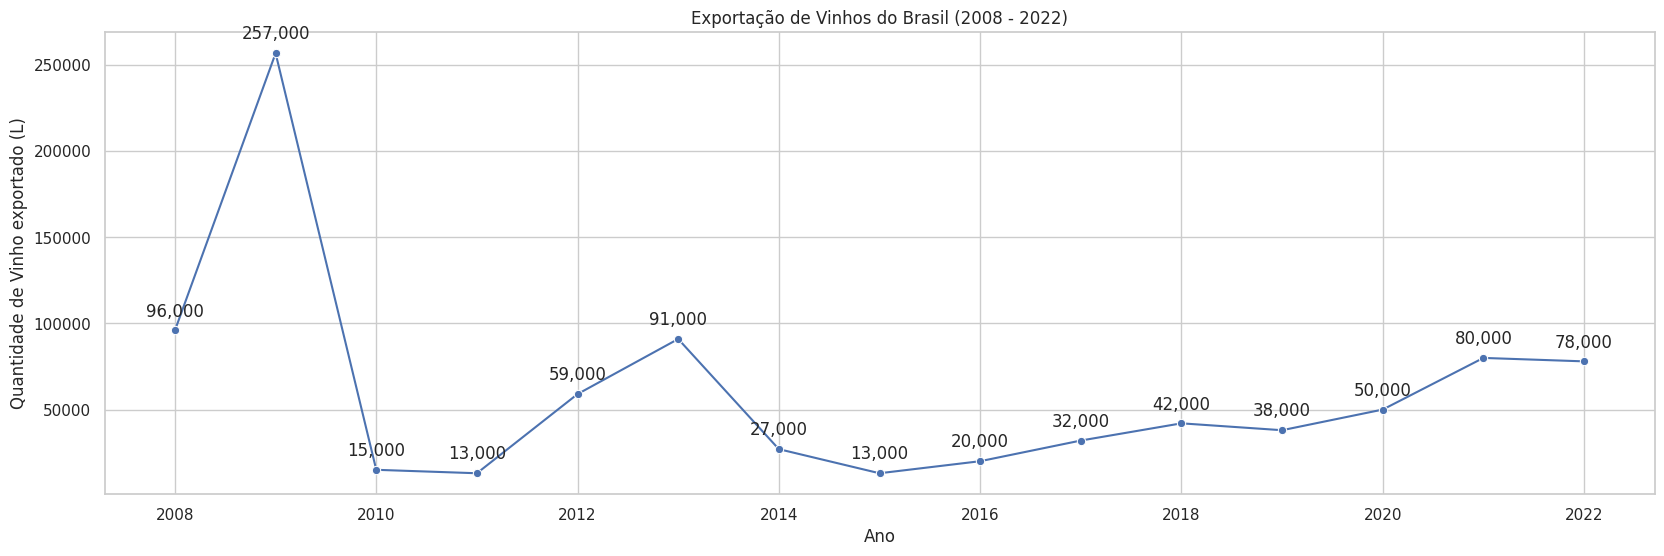

In [86]:
sns.set_theme(style="whitegrid")

# Criação do gráfico
plt.figure(figsize=(20, 6))
grafico = sns.lineplot(data=brazil_wine, x='Year', y='Total_Value', marker='o')

# Adicionar título e rótulos aos eixos
plt.title('Exportação de Vinhos do Brasil (2008 - 2022)')
plt.xlabel('Ano')
plt.ylabel('Quantidade de Vinho exportado (L)')

for i in range(len(brazil_wine)):
    valor_formatado = f"{brazil_wine['Total_Value'].iloc[i]:,}"
    plt.annotate(valor_formatado,
                 (brazil_wine['Year'].iloc[i], brazil_wine['Total_Value'].iloc[i]),
                 textcoords="offset points", 
                 xytext=(0,10), 
                 ha='center')
# Exibir o gráfico
plt.show()

### Exportação de vinho no Brasil (2008 - 2022)

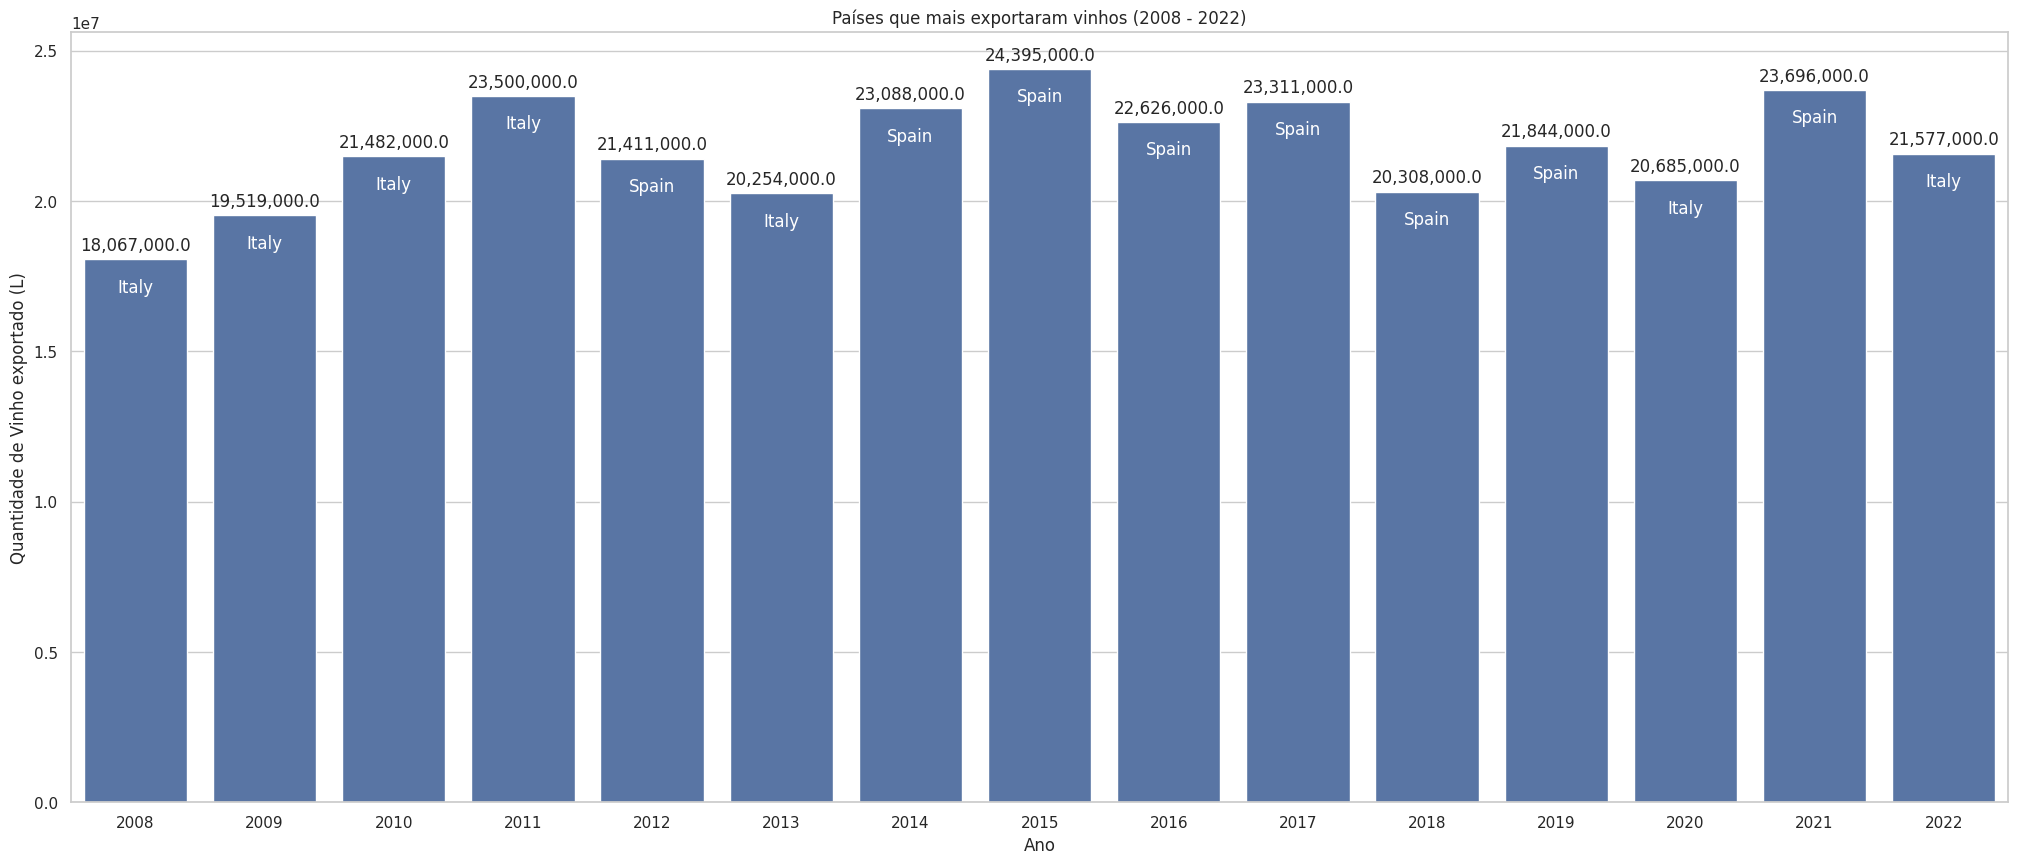

In [87]:
# Configuração estética opcional
sns.set_theme(style="whitegrid")

# Criar o gráfico
plt.figure(figsize=(25, 10))
grafico = sns.barplot(data=wine_world, x='Ano', y='Quantidade de Litros')

# Adicionar título e rótulos aos eixos
plt.title('Países que mais exportaram vinhos (2008 - 2022)')
plt.xlabel('Ano')
plt.ylabel('Quantidade de Vinho exportado (L)')

for p in grafico.patches:
    grafico.annotate(format(p.get_height(), ','),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha = 'center', va = 'center',
                     xytext = (0, 10), 
                     textcoords = 'offset points')
    
    grafico.annotate(wine_world['País'].iloc[grafico.patches.index(p)],
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha = 'center', va = 'center', color='white',
                     xytext = (0, -20), 
                     textcoords = 'offset points')

# Exibir o gráfico
plt.show()

In [88]:
# # Configuração estética opcional
# sns.set_theme(style="whitegrid")

# # Criar o gráfico de barras
# # plt.figure(figsize=(10, 6))
# grafico = sns.barplot(data=wine_world, x='Ano', y='Quantidade de Litros', hue='País')

# # Adicionar título e rótulos aos eixos
# plt.title('Países que mais exportaram vinhos (2008 - 2022)')
# plt.xlabel('Ano')
# plt.ylabel('Quantidade de Vinho exportado (L)')

# # Adicionar linhas de referência para a exportação do Brasil
# for _, row in brazil_wine.iterrows():
#     ano = row['Year']
#     quantidade = row['Total_Value']
#     plt.axhline(y=quantidade, color='red', linestyle='--', linewidth=1)
#     plt.text(ano, quantidade, f' Brasil: {quantidade:,} L', color='red', ha='right')

# # Exibir o gráfico
# plt.savefig('grafico_exportacao_vinhos.png')

# # Exibir mensagem de confirmação
# print("Gráfico salvo como 'grafico_exportacao_vinhos.png'")

#### Comparação RS x Brasil x Global

In [89]:
total_export_rs = pd.read_csv("files/total_export_df.csv")
total_export_rs

def convert_value(x):
    return (x/100)

temp_br = total_export_rs['Total_Value_Rio_Grande_do_Sul']
values = temp_br.apply(convert_value)
total_export_rs['Total_Value_Rio_Grande_do_Sul'] = values
total_export_rs

,Year,Total_Value_Rio_Grande_do_Sul
0,2008,103463.23
1,2009,255141.98
2,2010,12805.74
3,2011,12148.34
4,2012,57753.76
5,2013,91490.59
6,2014,23240.29
7,2015,11984.79
8,2016,17865.49
9,2017,28895.72


In [90]:
merged_dfs = pd.merge(merged_dfs, total_export_rs, on='Year')

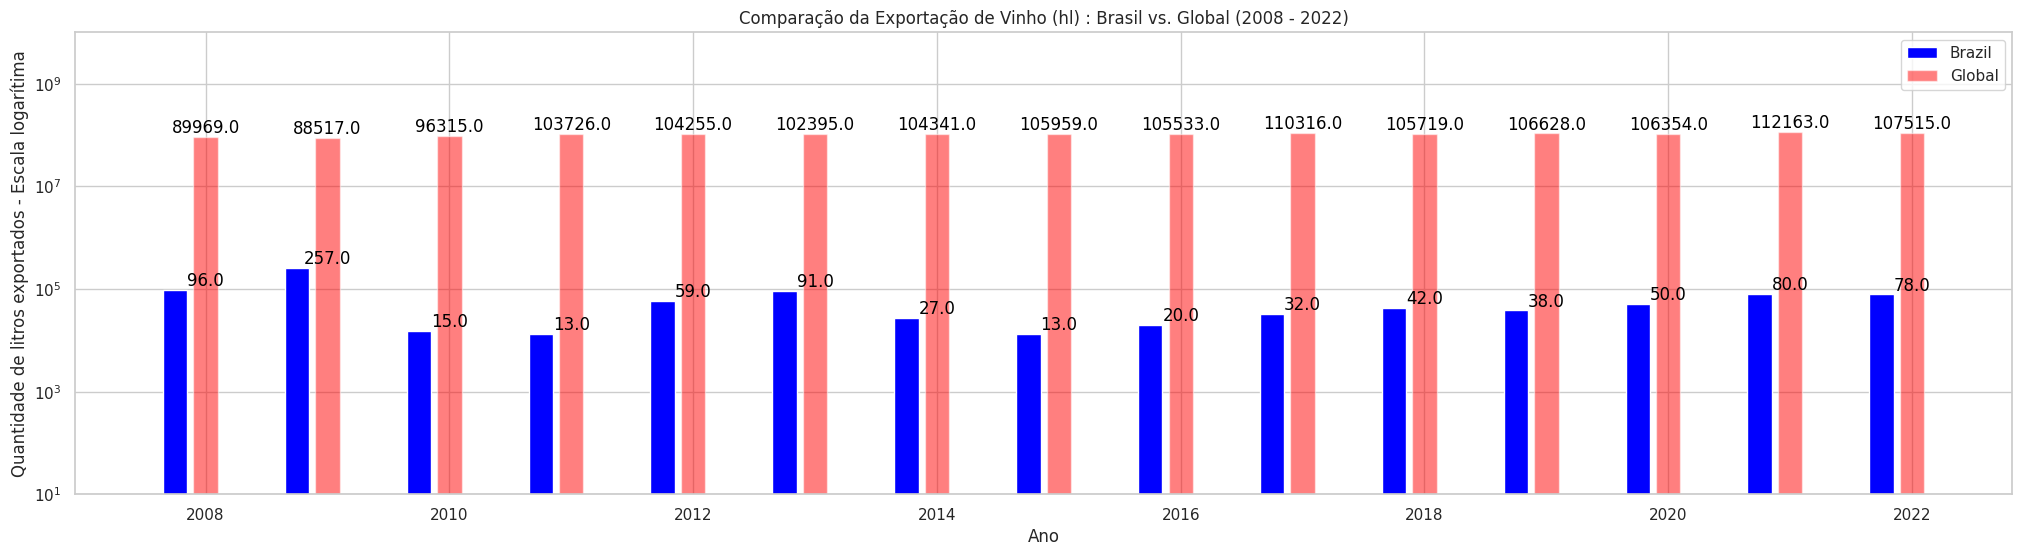

In [105]:
plt.figure(figsize=(25, 6))

# Plotar os valores de Total_Value_Brazil e Total_Value_Global por ano
# plt.bar(merged_dfs['Year'], merged_dfs['Total_Value_Brazil'], color='blue', label='Brazil')
# plt.bar(merged_dfs['Year'], merged_dfs['Total_Value_Global'], color='red', alpha=0.5, label='Global')
plt.bar(merged_dfs['Year'] - 0.25, merged_dfs['Total_Value_Brazil'], width=0.2, color='blue', label='Brazil')
plt.bar(merged_dfs['Year'], merged_dfs['Total_Value_Global'], width=0.2, color='red', alpha=0.5, label='Global')

for i, valor in enumerate(merged_dfs['Total_Value_Global']):
    plt.text(merged_dfs['Year'][i], valor, f'{valor/1000}', ha='center', va='bottom', color='black')
    
for i, valor in enumerate(merged_dfs['Total_Value_Brazil']):
    plt.text(merged_dfs['Year'][i], valor, f'{valor/1000}', ha='center', va='bottom', color='black')


plt.yscale('log')
plt.ylim(1e1, 1e10)

# Adicionar título e rótulos aos eixos
plt.title('Comparação da Exportação de Vinho (hl) : Brasil vs. Global (2008 - 2022)')
plt.xlabel('Ano')
plt.ylabel('Quantidade de litros exportados - Escala logarítima')
plt.legend()

# Exibir o gráfico
plt.savefig('Output files/grafico_exportacao_vinhos_br_rs_15_log.png')
plt.show()

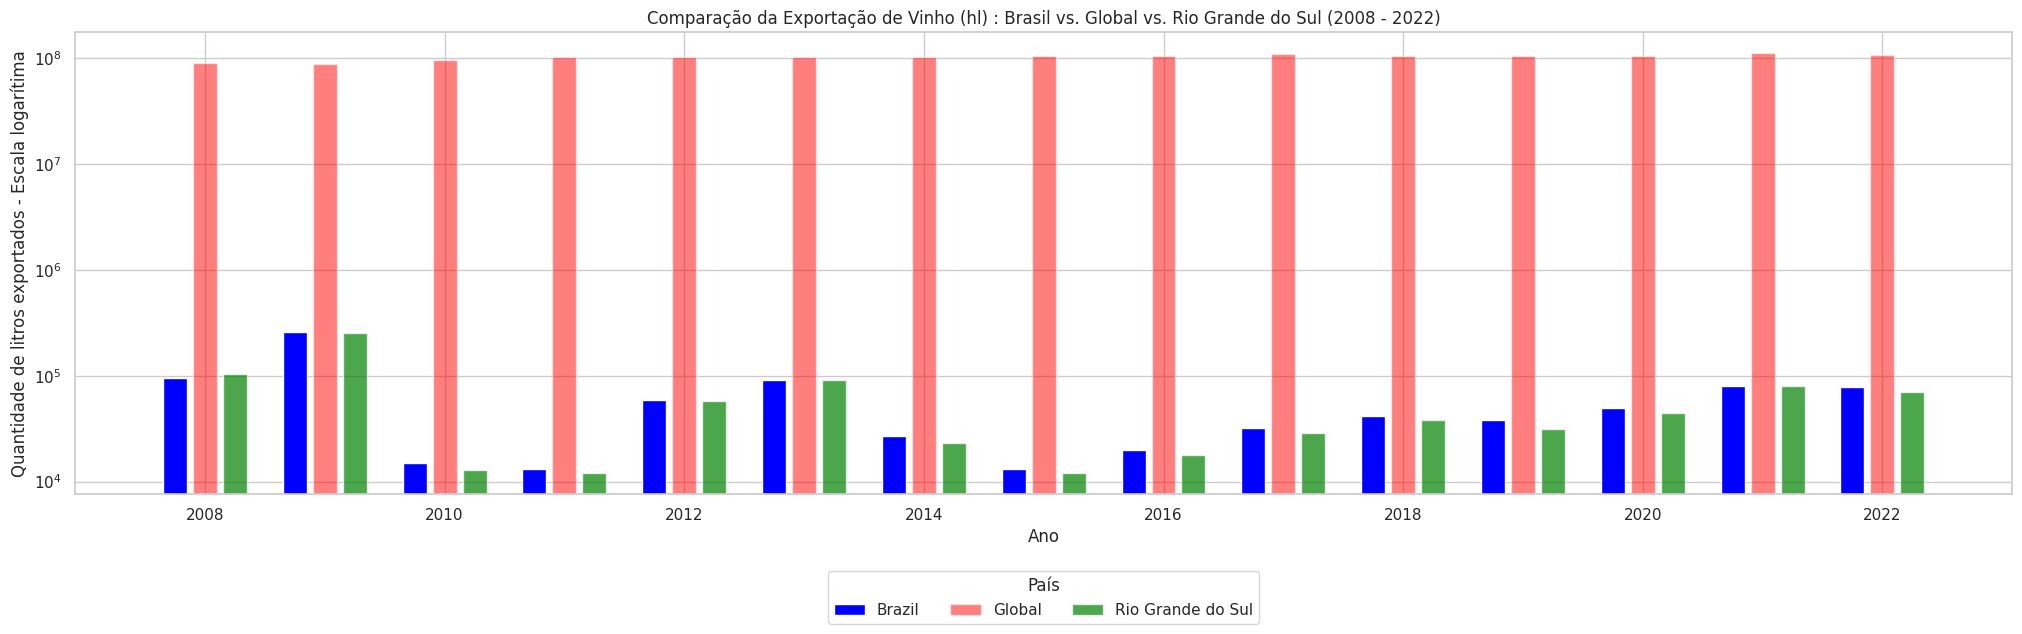

In [106]:
# Criar o gráfico
plt.figure(figsize=(25, 6))

# Plotar os valores de Total_Value_Brazil, Total_Value_Global e Total_Value_Rio_Grande_do_Sul por ano
plt.bar(merged_dfs['Year'] - 0.25, merged_dfs['Total_Value_Brazil'], width=0.2, color='blue', label='Brazil')
plt.bar(merged_dfs['Year'], merged_dfs['Total_Value_Global'], width=0.2, color='red', alpha=0.5, label='Global')
plt.bar(merged_dfs['Year'] + 0.25, merged_dfs['Total_Value_Rio_Grande_do_Sul'], width=0.2, color='green', alpha=0.7, label='Rio Grande do Sul')

# # Adicionar os valores nas barras do Brasil
# for i, valor in enumerate(merged_dfs['Total_Value_Brazil']):
#     plt.text(merged_dfs['Year'][i] - 0.2, valor, f'{valor/1000:.2f}', ha='center', va='bottom', color='black')

# # Adicionar os valores nas barras do Rio Grande do Sul
# for i, valor in enumerate(merged_dfs['Total_Value_Rio_Grande_do_Sul']):
#     plt.text(merged_dfs['Year'][i] + 0.2, valor, f'{valor/1000:.2f}', ha='center', va='bottom', color='black')

plt.yscale('log')

# Adicionar título e rótulos aos eixos
plt.title('Comparação da Exportação de Vinho (hl) : Brasil vs. Global vs. Rio Grande do Sul (2008 - 2022)')
plt.xlabel('Ano')
plt.ylabel('Quantidade de litros exportados - Escala logarítima')

plt.legend(title='País', bbox_to_anchor=(0.5, -0.15), loc='upper center', ncol=3)
plt.savefig('Output files/grafico_exportacao_vinhos_br_rs_global_15.png')

# Exibir o gráfico
plt.show()

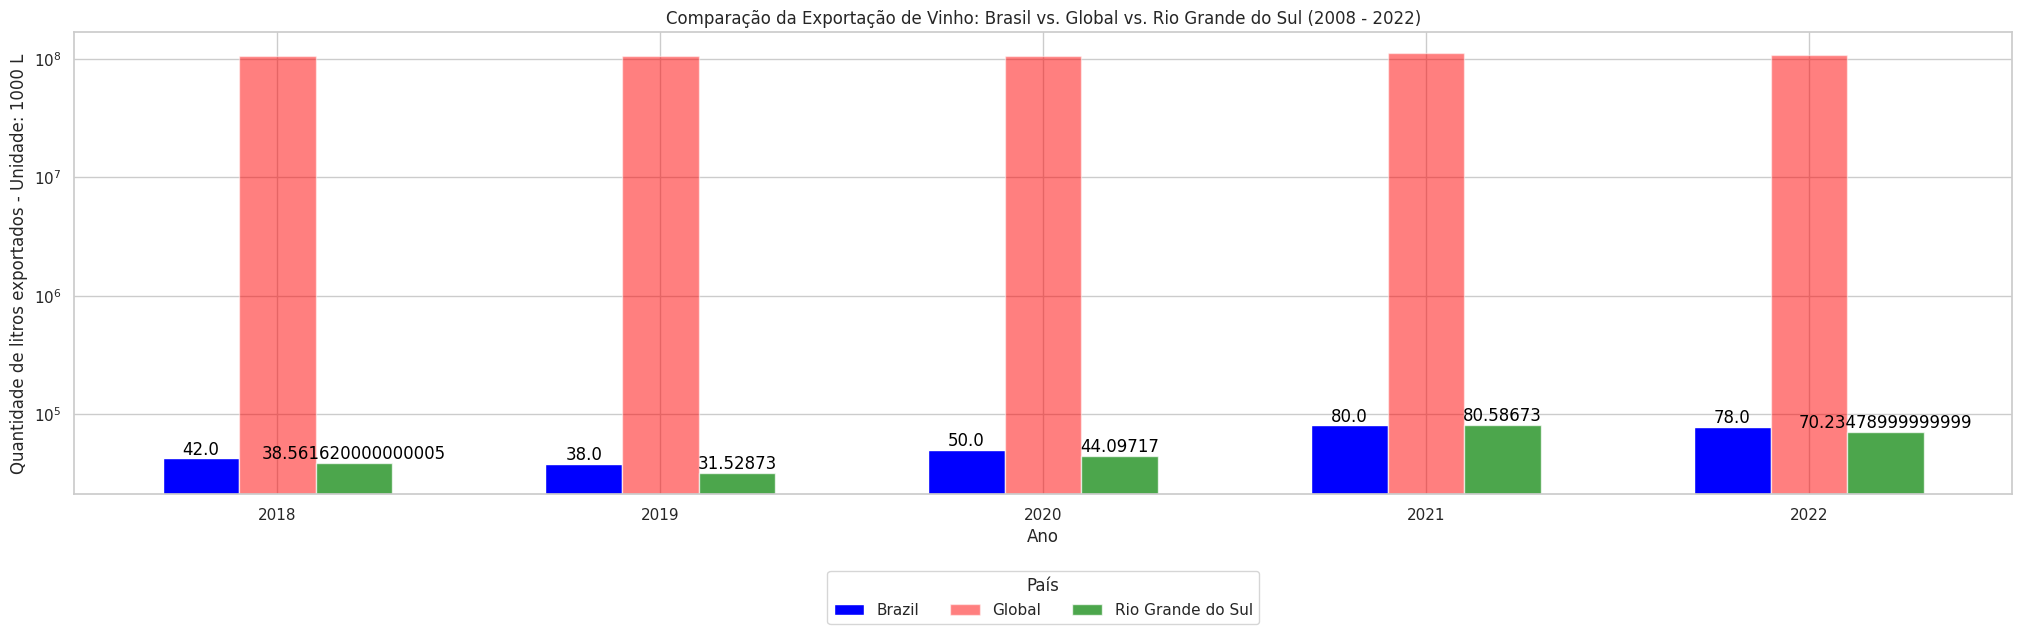

In [93]:
# VISAO DOS ULTIMOS CINCO ANOS
merged_dfs_filtered = merged_dfs[merged_dfs['Year'] >= 2018]

# Criar o gráfico
plt.figure(figsize=(25, 6))

# Plotar os valores de Total_Value_Brazil, Total_Value_Global e Total_Value_Rio_Grande_do_Sul por ano
plt.bar(merged_dfs_filtered['Year'] - 0.2, merged_dfs_filtered['Total_Value_Brazil'], width=0.2, color='blue', label='Brazil')
plt.bar(merged_dfs_filtered['Year'], merged_dfs_filtered['Total_Value_Global'], width=0.2, color='red', alpha=0.5, label='Global')
plt.bar(merged_dfs_filtered['Year'] + 0.2, merged_dfs_filtered['Total_Value_Rio_Grande_do_Sul'], width=0.2, color='green', alpha=0.7, label='Rio Grande do Sul')

# Adicionar os valores nas barras do Brasil
for i, valor in enumerate(merged_dfs_filtered['Total_Value_Brazil']):
    plt.text(merged_dfs_filtered['Year'].iloc[i] - 0.2, valor, f'{valor/1000}', ha='center', va='bottom', color='black')

# Adicionar os valores nas barras do Rio Grande do Sul
for i, valor in enumerate(merged_dfs_filtered['Total_Value_Rio_Grande_do_Sul']):
    plt.text(merged_dfs_filtered['Year'].iloc[i] + 0.2, valor, f'{valor/1000}', ha='center', va='bottom', color='black')

plt.yscale('log')

# Adicionar título e rótulos aos eixos
plt.title('Comparação da Exportação de Vinho (hl) : Brasil vs. Global vs. Rio Grande do Sul (2008 - 2022)')
plt.xlabel('Ano')
plt.ylabel('Quantidade de litros exportados - Escala logarítima')

plt.legend(title='País', bbox_to_anchor=(0.5, -0.15), loc='upper center', ncol=3)
plt.savefig('Output files/grafico_exportacao_vinhos_br_rs_global_5.png')

# Exibir o gráfico
plt.show()

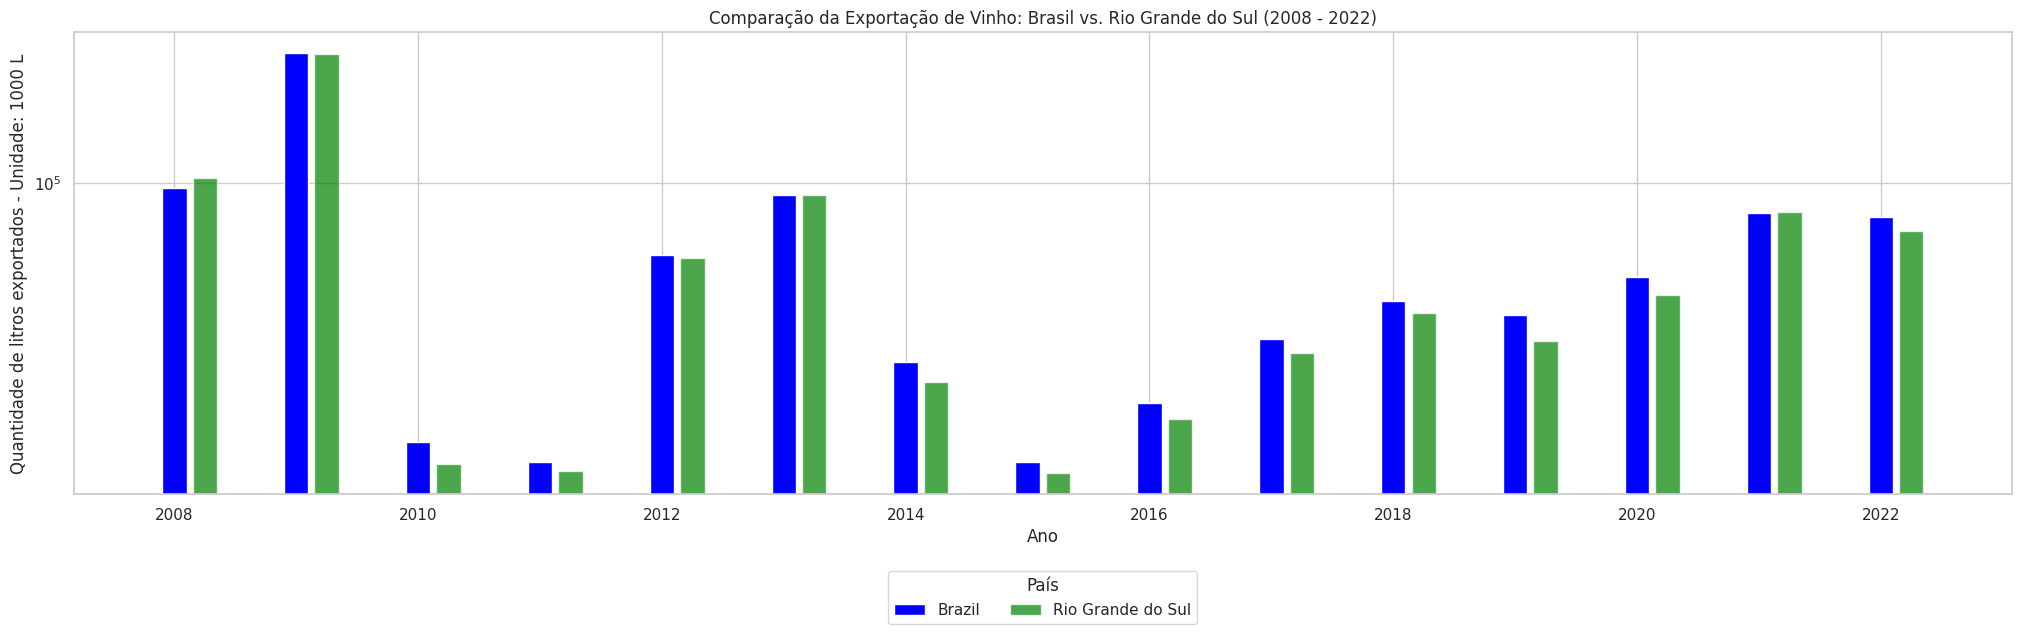

In [94]:
# Criar o gráfico
plt.figure(figsize=(25, 6))

# Plotar os valores de Total_Value_Brazil, Total_Value_Global e Total_Value_Rio_Grande_do_Sul por ano
plt.bar(merged_dfs['Year'], merged_dfs['Total_Value_Brazil'], width=0.2, color='blue', label='Brazil')
# plt.bar(merged_dfs['Year'], merged_dfs['Total_Value_Global'], width=0.2, color='red', alpha=0.5, label='Global')
plt.bar(merged_dfs['Year'] + 0.25, merged_dfs['Total_Value_Rio_Grande_do_Sul'], width=0.2, color='green', alpha=0.7, label='Rio Grande do Sul')

# # Adicionar os valores nas barras do Brasil
# for i, valor in enumerate(merged_dfs['Total_Value_Brazil']):
#     plt.text(merged_dfs['Year'][i] - 0.2, valor, f'{valor/1000:.2f}', ha='center', va='bottom', color='black')

# # Adicionar os valores nas barras do Rio Grande do Sul
# for i, valor in enumerate(merged_dfs['Total_Value_Rio_Grande_do_Sul']):
#     plt.text(merged_dfs['Year'][i] + 0.2, valor, f'{valor/1000:.2f}', ha='center', va='bottom', color='black')

plt.yscale('log')

# Adicionar título e rótulos aos eixos
plt.title('Comparação da Exportação de Vinho: Brasil vs. Rio Grande do Sul (2008 - 2022)')
plt.xlabel('Ano')
plt.ylabel('Quantidade de litros exportados - Unidade: hl')

plt.legend(title='País', bbox_to_anchor=(0.5, -0.15), loc='upper center', ncol=3)
plt.savefig('Output files/grafico_exportacao_vinhos_br_e_rs.png')
# Exibir o gráfico
plt.show()